In [1]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 3.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import csv
import numpy as np
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
file_loc = "https://raw.githubusercontent.com/rizkyyanuark/College/main/datamining/combined.csv"
data_scrape = pd.read_csv(file_loc)
data_scrape

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1785300561094644037,Tue Apr 30 13:29:57 +0000 2024,0,selain kasus salah sasaran kipk ada jg yg dise...,1785300561094644037,NaN,NaN,in,NaN,0,0,0,https://twitter.com/jiegree/status/17853005610...,1344526407938916357,jiegree
1,1785300394010452166,Tue Apr 30 13:29:17 +0000 2024,0,Makin banyak yang ke spill yang kipk tapi tern...,1785300394010452166,NaN,NaN,in,Johnny,0,0,0,https://twitter.com/whosrahmah/status/17853003...,1187581909267701761,whosrahmah
2,1785253406166393056,Tue Apr 30 13:26:44 +0000 2024,0,@personality404_ the thing isss apakah that in...,1785299751065485367,NaN,personality404_,in,NaN,0,0,0,https://twitter.com/gagagagawrra/status/178529...,1662451301547118592,gagagagawrra
3,1785299607414886693,Tue Apr 30 13:26:10 +0000 2024,0,Banyak amat kipk salah sasaran inimah yg salah...,1785299607414886693,NaN,NaN,in,♡,0,0,0,https://twitter.com/samohaec/status/1785299607...,1734519974390317056,samohaec
4,1785270395622539737,Tue Apr 30 13:24:13 +0000 2024,0,@boomboomna @undipmenfess ini undip bnyk bener...,1785299116396102054,NaN,boomboomna,in,NaN,0,1,0,https://twitter.com/Nazifamulya/status/1785299...,1160811689937235968,Nazifamulya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,1784890813501391093,Mon Apr 29 10:41:01 +0000 2024,0,@markfsoul mmf zan tapi aku bukan penerima kip...,1784895657053913391,NaN,markfsoul,in,Jakarta Selatan,0,1,0,https://twitter.com/ssenabluu/status/178489565...,2397505423,ssenabluu
4027,1328338212721311746,Mon Apr 29 10:40:46 +0000 2024,1,@digidegu Ohhh gini kelakukan penerima KIPK go...,1784895594584031590,NaN,digidegu,in,NaN,1,1,0,https://twitter.com/if_amall/status/1784895594...,1668011559547961344,if_amall
4028,1784895346692554790,Mon Apr 29 10:39:47 +0000 2024,0,Itu penerima kipk di kuliti habis2an sampe dia...,1784895346692554790,NaN,NaN,in,NaN,0,0,0,https://twitter.com/PMunceri/status/1784895346...,1784001049818505216,PMunceri
4029,1784895317474730334,Mon Apr 29 10:39:40 +0000 2024,0,Penerima kipk kan dah ada indikatornya ya... k...,1784895317474730334,NaN,NaN,in,NaN,0,1,0,https://twitter.com/ncddream/status/1784895317...,814624634498752512,ncddream


In [5]:
data_scrape = data_scrape[['created_at', 'full_text']].rename(columns={'created_at': 'date', 'full_text': 'tweet'}).drop_duplicates()
data_scrape

,date,tweet
0,Tue Apr 30 13:29:57 +0000 2024,selain kasus salah sasaran kipk ada jg yg dise...
1,Tue Apr 30 13:29:17 +0000 2024,Makin banyak yang ke spill yang kipk tapi tern...
2,Tue Apr 30 13:26:44 +0000 2024,@personality404_ the thing isss apakah that in...
3,Tue Apr 30 13:26:10 +0000 2024,Banyak amat kipk salah sasaran inimah yg salah...
4,Tue Apr 30 13:24:13 +0000 2024,@boomboomna @undipmenfess ini undip bnyk bener...
...,...,...
4026,Mon Apr 29 10:41:01 +0000 2024,@markfsoul mmf zan tapi aku bukan penerima kip...
4027,Mon Apr 29 10:40:46 +0000 2024,@digidegu Ohhh gini kelakukan penerima KIPK go...
4028,Mon Apr 29 10:39:47 +0000 2024,Itu penerima kipk di kuliti habis2an sampe dia...
4029,Mon Apr 29 10:39:40 +0000 2024,Penerima kipk kan dah ada indikatornya ya... k...


In [6]:
jumlah_tweet = data_scrape["tweet"].count()
print(f"Jumlah tweet: {jumlah_tweet}")
jumlah_nan = data_scrape.isnull().sum().sum()
print(f"Jumlah data NaN: {jumlah_nan}")

Jumlah tweet: 3938
Jumlah data NaN: 0


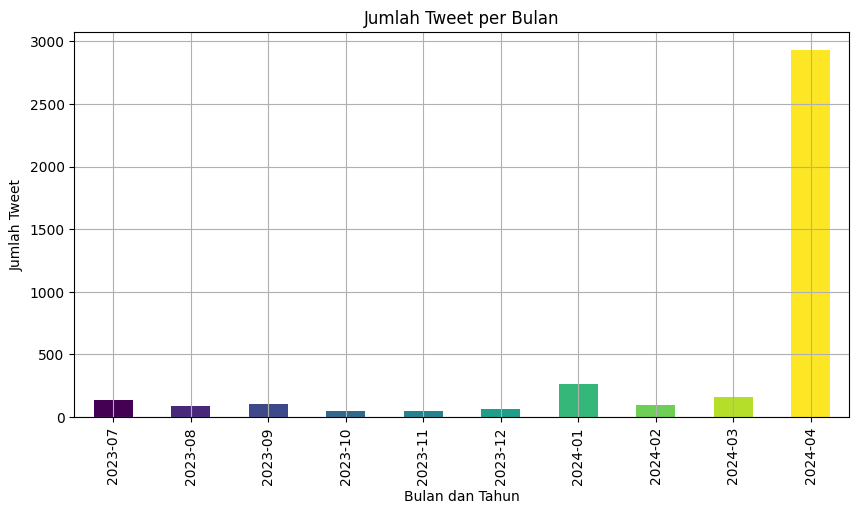

In [7]:
tweets = data_scrape.copy()
tweets['date'] = pd.to_datetime(tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')
tweets['YearMonth'] = tweets['date'].dt.to_period('M')
monthly_tweets = tweets.groupby('YearMonth').size()
colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_tweets)))
monthly_tweets.plot(kind='bar', figsize=(10, 5), color=colors)
plt.xlabel("Bulan dan Tahun")
plt.ylabel("Jumlah Tweet")
plt.title("Jumlah Tweet per Bulan")
plt.grid(True)
plt.show()
data_scrape = data_scrape[['tweet']]

In [8]:
stopword_bahasa = pd.read_csv('https://raw.githubusercontent.com/rizky-22017-mhs-unesa-ac-id/Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X/main/Dataset/TextNormalization/stopwordbahasa.csv', encoding='latin-1')
stopword_bahasa = stopword_bahasa.rename(columns={0: 'stop'})
# stopword_bahasa.head()

kamus_alay = pd.read_csv('https://raw.githubusercontent.com/rizky-22017-mhs-unesa-ac-id/Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X/main/Dataset/TextNormalization/kamus_alay.csv', header=None, encoding='latin-1')
kamus_alay = kamus_alay.rename(columns={0: 'original',
                                     1: 'replacement'})
kamus_alay_map = dict(zip(kamus_alay['original'], kamus_alay['replacement']))
# kamus_alay.head()

kamus_singkatan = pd.read_csv('https://raw.githubusercontent.com/rizky-22017-mhs-unesa-ac-id/Sentiment-Analysis-of-KIP-Recipients-based-on-Tweets-from-X/main/Dataset/TextNormalization/kamus_singkatan.csv', sep=';', encoding='latin-1')
kamus_singkatan.columns = ['Column1', 'Column2']
kamus_singkatan = kamus_singkatan.rename(columns={'Column1': 'original', 'Column2': 'replacement'})
kamus_singkatan_map = dict(zip(kamus_singkatan['original'], kamus_singkatan['replacement']))
# kamus_singkatan.head()

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\n', ' ', text) # Remove every newline character
    text = re.sub(r'@[A-Za-z0-9_]+', ' ', text) # Remove every username
    text = re.sub('user', ' ', text) # Remove every occurrence of the word 'user'
    text = re.sub('rt', ' ', text) # Remove every retweet symbol
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Remove every URL
    text = re.sub('https?://t\.me/[^\s]+', ' ', text) # Remove every Telegram link
    text = re.sub ('[^0-9a-zA-Z]+', ' ', text) # Remove every non-alphanumeric character
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text

In [10]:
data_scrape['cleaning'] = data_scrape.tweet.apply(clean_text)
data_scrape.head()

,tweet,cleaning
0,selain kasus salah sasaran kipk ada jg yg dise...,selain kasus salah sasaran kipk ada jg yg dise...
1,Makin banyak yang ke spill yang kipk tapi tern...,makin banyak yang ke spill yang kipk tapi tern...
2,@personality404_ the thing isss apakah that in...,the thing isss apakah that influencer mau diw...
3,Banyak amat kipk salah sasaran inimah yg salah...,banyak amat kipk salah sasaran inimah yg salah...
4,@boomboomna @undipmenfess ini undip bnyk bener...,ini undip bnyk bener ee kejadian kipk salah s...


In [11]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Text preprocessing functions from previous script
def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text
def transform_emoticons(text):
    text = text.replace("<3", "<love>")
    text = text.replace(":p", "<mengejek>")
    text = text.replace(":P", "<mengejek>")
    text = text.replace(":v", "<melucu>")
    text = text.replace(":V", "<melucu>")
    text = text.replace(":d", "<tertawa>")
    text = text.replace(":D", "<tertawa>")
    text = text.replace(":-D", "<tertawa>")
    text = text.replace(":o", "<terkejut>")
    text = text.replace(":O", "<terkejut>")
    text = text.replace("xD", "<tertawa terbahak bahak>")
    text = text.replace("XD", "<tertawa terbahak bahak>")
    text = text.replace(":*", "<mencium>")
    text = text.replace(":3", "<malu malu kucing>")
    text = text.replace("-__-", "<wajah datar>")
    text = text.replace("-_-", "<wajah datar>")
    text = text.replace(":|", "<wajah datar>")
    text = text.replace(":\\", "<terganggu>")
    text = text.replace(":/", "<terganggu>")
    text = text.replace(":))", "<senyum>")
    text = text.replace(":)", "<senyum>")
    text = text.replace(":-))", "<senyum>")
    text = text.replace(":-)", "<senyum>")
    text = text.replace("^^", "<senyum>")
    text = text.replace("^_^", "<senyum>")
    text = text.replace(";))", "<senyum berkedip>")
    text = text.replace(";)", "<senyum berkedip>")
    text = text.replace(":((", "<sedih>")
    text = text.replace(":(", "<sedih>")
    text = text.replace(":-((", "<sedih>")
    text = text.replace(":-(", "<sedih>")
    text = text.replace(":'((", "<menangis sedih>")
    text = text.replace(":'(", "<menangis sedih>")
    text = text.replace(":'))", "<menangis bahagia>")
    text = text.replace(":')", "<menangis bahagia>")
    text = text.replace(":'", "<menangis sedih>")
    text = text.replace(":’((", "<menangis sedih>")
    text = text.replace(":’(", "<menangis sedih>")
    text = text.replace(":’))", "<menangis bahagia>")
    text = text.replace(":’)", "<menangis bahagia>")
    text = text.replace(":’", "<menangis sedih>")
    text = text.replace(":\"((", "<menangis sedih>")
    text = text.replace(":\"(", "<menangis sedih>")
    text = text.replace(":\"))", "<menangis bahagia>")
    text = text.replace(":\")", "<menangis bahagia>")
    text = text.replace(":\"", "<menangis sedih>")
    text = text.replace(":\"D", "<menangis bahagia>")
    text = text.replace("TT", "<menangis sedih>")
    return text

def normalize_alay(text):
    return ' '.join([kamus_alay_map[word] if word in kamus_alay_map else word for word in text.split(' ')])

def normalize_singkatan(text):
    return ' '.join([kamus_singkatan_map[word] if word in kamus_singkatan_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join([ ' ' if word in stopword_bahasa.ada.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    return ' '.join(do)

# Modified clean_text function that calls preprocessing functions from previous script
def preprocess(text):
    text = normalize_alay(text) # Normalize text using alay_dict_map
    text = normalize_singkatan(text) # Normalize text using alay_dict_map2
    text = remove_stopword(text) # Remove stopwords from text
    text = tokenizingText(text)
    text = stemming(text)
    return text

In [12]:
data_scrape['preprocessing'] = data_scrape['cleaning'].apply(preprocess)
data_scrape

,tweet,cleaning,preprocessing
0,selain kasus salah sasaran kipk ada jg yg dise...,selain kasus salah sasaran kipk ada jg yg dise...,salah sasar kipk ada program keluarga harap pa...
1,Makin banyak yang ke spill yang kipk tapi tern...,makin banyak yang ke spill yang kipk tapi tern...,spill kipk hidup boros alias salah sasar kasih...
2,@personality404_ the thing isss apakah that in...,the thing isss apakah that influencer mau diw...,the thing isss that influencer wawancara kipk ...
3,Banyak amat kipk salah sasaran inimah yg salah...,banyak amat kipk salah sasaran inimah yg salah...,kipk salah sasar inimah salah seleksi kipk nya...
4,@boomboomna @undipmenfess ini undip bnyk bener...,ini undip bnyk bener ee kejadian kipk salah s...,undip tahi jadi kipk salah sasar
...,...,...,...
4026,@markfsoul mmf zan tapi aku bukan penerima kip...,mmf zan tapi aku bukan penerima kipk ukt 8jt ...,mmf zan terima kipk ukt 8jt ter seok seok
4027,@digidegu Ohhh gini kelakukan penerima KIPK go...,ohhh gini kelakukan penerima kipk goblok pemb...,ohhh laku terima kipk goblok pembokep
4028,Itu penerima kipk di kuliti habis2an sampe dia...,itu penerima kipk di kuliti habis2an sampe dia...,terima kipk kulit habis2an rep base friends wi...
4029,Penerima kipk kan dah ada indikatornya ya... k...,penerima kipk kan dah ada indikatornya ya kalo...,terima kipk ada indikator ya rasa anak sesuai ...


In [14]:
# Load model
model = load_model('/content/best_model_bow.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [16]:
# Define constants
num_words = 5000
max_len = 50
sentiment_classes = ['Positive', 'Neutral', 'Negative']

# Load the pre-trained model
model = load_model('/content/best_model_bow.h5')

# Apply the preprocessing function to the 'tweet' column
data_scrape['processed_tweet'] = data_scrape['tweet'].apply(preprocess)

In [17]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=num_words, oov_token='OOV')
tokenizer.fit_on_texts(data_scrape['processed_tweet'])

# Transform the tweets to sequences
sequences = tokenizer.texts_to_sequences(data_scrape['processed_tweet'])

# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [18]:
# Predict the sentiment
predictions = model.predict(padded_sequences).argmax(axis=1)

# Map the prediction labels
predicted_labels = [sentiment_classes[prediction] for prediction in predictions]

# Add the predicted labels to the dataframe
data_scrape['label'] = predicted_labels

# Save the dataframe to a new CSV file
data_scrape.to_csv('file_with_predictions.csv', index=False)

124/124 [==============================] - 2s 6ms/step


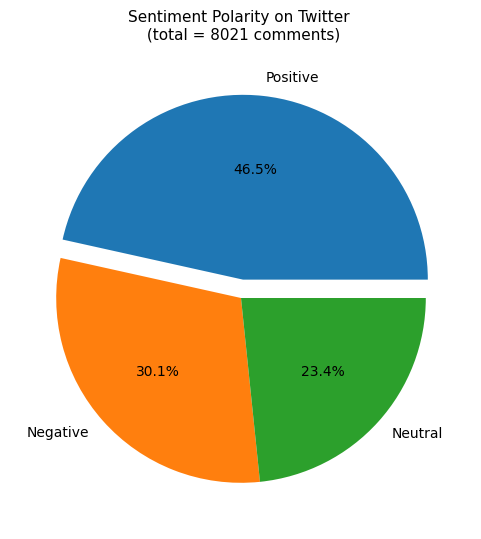

In [19]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in data_scrape['label'].value_counts()]
labels = list(data_scrape['label'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 10})
ax.set_title('Sentiment Polarity on Twitter \n (total = 8021 comments)', fontsize = 11, pad = 20)
plt.show()

In [20]:
import requests
from PIL import Image
from io import BytesIO

url = "https://image.freepik.com/free-icon/twitter-logo_318-40459.jpg"  # replace with your image URL
response = requests.get(url)
twitter_mask = np.array(Image.open(BytesIO(response.content)))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_scrape.loc[data_scrape['label'] == 'positive', 'processed_tweet']))
plt.figure(figsize=(18,10))
plt.title('Top words for Positive Tweet',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_scrape.loc[data_scrape['label'] == 'negative', 'processed_tweet']))
plt.figure(figsize=(18,10))
plt.title('Top words for Negative Tweet',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in data_scrape.loc[data_scrape['label'] == 'neutral', 'processed_tweet']))
plt.figure(figsize=(18,10))
plt.title('Top words for Neutral Tweet',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()